In [63]:
import netCDF4
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from matplotlib.colors import LinearSegmentedColormap
import csv, sys, pdb, time, math
import xarray as xr

In [64]:
file = "/Users/oz/Downloads/A20182132018243.L3m_MO_CHL_chlor_a_4km.nc"

In [65]:
rootgrp = netCDF4.Dataset(file, "r", format="NETCDF4")

In [66]:
print(rootgrp.data_model)
print(rootgrp.dimensions)

print(rootgrp.variables)
print(len(rootgrp.dimensions.get("lat")))
print(len(rootgrp.dimensions.get("lon")))

NETCDF4
OrderedDict([('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 4320
), ('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 8640
), ('rgb', <class 'netCDF4._netCDF4.Dimension'>: name = 'rgb', size = 3
), ('eightbitcolor', <class 'netCDF4._netCDF4.Dimension'>: name = 'eightbitcolor', size = 256
)])
OrderedDict([('chlor_a', <class 'netCDF4._netCDF4.Variable'>
float32 chlor_a(lat, lon)
    long_name: Chlorophyll Concentration, OCI Algorithm
    units: mg m^-3
    standard_name: mass_concentration_of_chlorophyll_in_sea_water
    _FillValue: -32767.0
    valid_min: 0.001
    valid_max: 100.0
    reference: Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a algorithms for oligotrophic oceans: A novel approach based on three-band reflectance difference, J. Geophys. Res., 117, C01011, doi:10.1029/2011JC007395.
    display_scale: log
    display_min: 0.01
    display_max: 20.0
unlimited dimensions: 
current shape = (4320, 8640)
filling on), ('lat', <cla

In [67]:
aVar = rootgrp.variables.get('chlor_a') # a Variable Object
print(aVar)

<class 'netCDF4._netCDF4.Variable'>
float32 chlor_a(lat, lon)
    long_name: Chlorophyll Concentration, OCI Algorithm
    units: mg m^-3
    standard_name: mass_concentration_of_chlorophyll_in_sea_water
    _FillValue: -32767.0
    valid_min: 0.001
    valid_max: 100.0
    reference: Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a algorithms for oligotrophic oceans: A novel approach based on three-band reflectance difference, J. Geophys. Res., 117, C01011, doi:10.1029/2011JC007395.
    display_scale: log
    display_min: 0.01
    display_max: 20.0
unlimited dimensions: 
current shape = (4320, 8640)
filling on


In [68]:
# get lat dimension
theLatDim = rootgrp.dimensions.get("lat")
latSize = theLatDim.size
print(latSize)

# the lon dimensions
lonSize = rootgrp.dimensions.get("lon").size
print(lonSize)

grid = np.zeros((latSize, lonSize))

latGrid = np.zeros((latSize))
lonGrid = np.zeros((lonSize))
ltVar = rootgrp.variables.get('lat')
lnVar = rootgrp.variables.get('lon')

for lt in range(latSize):
    latGrid[lt] = ltVar[lt]
#     print(ltVar[lt], "\t", end="\n")
for ln in range(lonSize):
    lonGrid[ln] = lnVar[ln]
#     print(lnVar[ln], end="")

#iterate the netcdf array at the surface (0)
# for lt in range(latSize):
#     for ln in range(lonSize):
#         print(aVar[lt, ln], end="")
#     print()

4320
8640


In [69]:
chlor_a_ds = xr.open_dataset(file)

In [53]:
print(chlor_a_ds)

<xarray.Dataset>
Dimensions:  (eightbitcolor: 256, lat: 4320, lon: 8640, rgb: 3)
Coordinates:
  * lat      (lat) float32 89.979164 89.9375 89.89583 ... -89.93751 -89.97918
  * lon      (lon) float32 -179.97917 -179.9375 ... 179.93752 179.97917
Dimensions without coordinates: eightbitcolor, rgb
Data variables:
    chlor_a  (lat, lon) float32 ...
    palette  (rgb, eightbitcolor) uint8 ...
Attributes:
    product_name:                      A20182132018243.L3m_MO_CHL_chlor_a_4km.nc
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    temporal_range:                    month
    processing_version:                2018.0
    date_created:                      2018-10-09T21:47:08.000Z
    history:                           l3mapgen par=A20182132018243.L3m_MO_CH...
    l2_flag_names:                

In [70]:
chlor_da = chlor_a_ds['chlor_a'].values

In [71]:
print(chlor_da.shape)
latVals = chlor_a_ds['lat'].values
lonVals = chlor_a_ds['lon'].values
print(latVals)
print(lonVals)

(4320, 8640)
[ 89.979164  89.9375    89.89583  ... -89.895836 -89.93751  -89.97918 ]
[-179.97917 -179.9375  -179.89584 ...  179.89583  179.93752  179.97917]


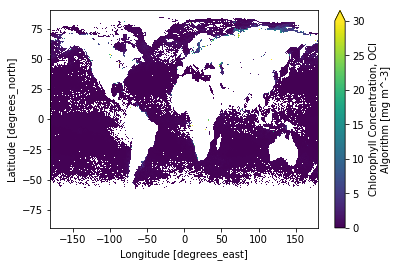

In [78]:
chlor_a_ds['chlor_a'].plot.imshow(vmin=0.0, vmax=30.0)

In [73]:
latVals = chlor_a_ds['lat'].values

In [74]:
print(latVals)

[ 89.979164  89.9375    89.89583  ... -89.895836 -89.93751  -89.97918 ]


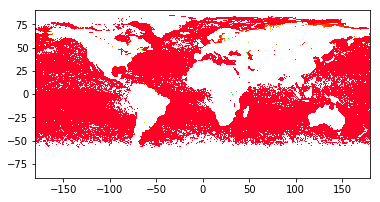

In [75]:
plt.imshow(chlor_da, extent=(lonVals.min(), lonVals.max(), latVals.min(), latVals.max()),
          interpolation='nearest', cmap=cm.gist_rainbow) #LRBT
plt.show()

In [76]:
lapush_da = chlor_a_ds['chlor_a'].sel(lat=[47.97], lon=[-125.37], method='nearest')

In [77]:
lapush_da

<xarray.DataArray 'chlor_a' (lat: 1, lon: 1)>
array([[4.308369]], dtype=float32)
Coordinates:
  * lat      (lat) float32 47.979168
  * lon      (lon) float32 -125.354164
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0